In [2]:
import json
import os
from copy import deepcopy
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

outdir = '/home/yuan/results/epitope'

2025-04-02 21:33:06.724350: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-02 21:33:06.730957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743643986.739241  239954 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743643986.741972  239954 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-02 21:33:06.750426: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
infile = '/home/yuan/results/epitope/combined_features.txt'
df = pd.read_csv(infile, sep='\t', header=0, index_col=None)
print(df.shape)

(3182867, 457)


In [4]:
# normalization X
from sklearn.preprocessing import StandardScaler

X = np.array(df.iloc[:,2:], dtype=np.float16)
print(X.shape, X.dtype)

scaler = StandardScaler()
norm_X = scaler.fit_transform(X)

(3182867, 455) float16


### ANN

In [5]:
model = tf.keras.models.load_model('../models/epitopes_ann.keras')

I0000 00:00:1743644096.557719  239954 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1118 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
pred_ann = np.array([])

chunks = np.array_split(norm_X, 10)
for chunk in chunks:
    pred1 = model.predict(chunk, verbose=1)
    pred_ann = np.concatenate([pred_ann, pred1.flatten()])
print(pred_ann.shape)

I0000 00:00:1743644099.619069  242868 service.cc:148] XLA service 0x700d58004e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743644099.619092  242868 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-04-02 21:34:59.621941: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743644099.635719  242868 cuda_dnn.cc:529] Loaded cuDNN version 90800


 117/9947 ━━━━━━━━━━━━━━━━━━━━ 4s 433us/step     

E0000 00:00:1743644100.047124  242868 buffer_comparator.cc:157] Difference at 16: 0.0655556, expected 260.803
E0000 00:00:1743644100.047149  242868 buffer_comparator.cc:157] Difference at 17: -0.0419383, expected 274.951
E0000 00:00:1743644100.047151  242868 buffer_comparator.cc:157] Difference at 18: 0.0546528, expected 253.659
E0000 00:00:1743644100.047152  242868 buffer_comparator.cc:157] Difference at 19: 0.0065602, expected 257.607
E0000 00:00:1743644100.047153  242868 buffer_comparator.cc:157] Difference at 20: -0.072243, expected 250.262
E0000 00:00:1743644100.047154  242868 buffer_comparator.cc:157] Difference at 21: -0.0252948, expected 258.782
E0000 00:00:1743644100.047155  242868 buffer_comparator.cc:157] Difference at 22: 0.00136608, expected 253.591
E0000 00:00:1743644100.047156  242868 buffer_comparator.cc:157] Difference at 23: -0.0153834, expected 258.759
E0000 00:00:1743644100.047158  242868 buffer_comparator.cc:157] Difference at 24: -0.0537997, expected 259.406
E0000

9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 478us/step


E0000 00:00:1743644104.813169  242869 buffer_comparator.cc:157] Difference at 16: -0.0966797, expected 264.849
E0000 00:00:1743644104.813194  242869 buffer_comparator.cc:157] Difference at 17: -0.0581055, expected 265.149
E0000 00:00:1743644104.813196  242869 buffer_comparator.cc:157] Difference at 18: -0.0873413, expected 273.266
E0000 00:00:1743644104.813197  242869 buffer_comparator.cc:157] Difference at 19: -0.105164, expected 247.175
E0000 00:00:1743644104.813198  242869 buffer_comparator.cc:157] Difference at 20: -0.12262, expected 256.057
E0000 00:00:1743644104.813200  242869 buffer_comparator.cc:157] Difference at 21: -0.101929, expected 259.822
E0000 00:00:1743644104.813201  242869 buffer_comparator.cc:157] Difference at 22: -0.0507812, expected 261.887
E0000 00:00:1743644104.813202  242869 buffer_comparator.cc:157] Difference at 23: -0.0775757, expected 257.228
E0000 00:00:1743644104.813203  242869 buffer_comparator.cc:157] Difference at 24: -0.115906, expected 261.437
E0000 

9947/9947 ━━━━━━━━━━━━━━━━━━━━ 4s 424us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 4s 393us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 6s 554us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 4s 397us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 482us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 4s 450us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 535us/step


E0000 00:00:1743644147.766490  242866 buffer_comparator.cc:157] Difference at 16: -1.01855, expected 251.778
E0000 00:00:1743644147.766519  242866 buffer_comparator.cc:157] Difference at 17: 0.680664, expected 275.577
E0000 00:00:1743644147.766521  242866 buffer_comparator.cc:157] Difference at 18: -0.449707, expected 260.651
E0000 00:00:1743644147.766522  242866 buffer_comparator.cc:157] Difference at 19: -0.640137, expected 254.403
E0000 00:00:1743644147.766524  242866 buffer_comparator.cc:157] Difference at 20: -0.710938, expected 251.352
E0000 00:00:1743644147.766525  242866 buffer_comparator.cc:157] Difference at 21: 0.394043, expected 248.071
E0000 00:00:1743644147.766526  242866 buffer_comparator.cc:157] Difference at 22: -0.776367, expected 255.59
E0000 00:00:1743644147.766527  242866 buffer_comparator.cc:157] Difference at 23: -0.349121, expected 251.383
E0000 00:00:1743644147.766528  242866 buffer_comparator.cc:157] Difference at 24: 1.49121, expected 257.893
E0000 00:00:1743

9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 465us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 528us/step
(3182867,)


## ANN with customery loss

In [9]:
def weighted_binary_crossentropy(pos_weight=1.0):
    def loss(y_true, y_pred):
        # Standard BCE
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        # Apply weighting
        weight_vector = y_true * pos_weight + (1 - y_true) * 1.0
        weighted_bce = weight_vector * bce
        
        return tf.reduce_mean(weighted_bce)
    return loss
    
model = tf.keras.models.load_model(
    '../models/epitopes_ann_weights.keras',
    custom_objects={'loss': weighted_binary_crossentropy}
)

In [10]:
pred_wann = np.array([])

chunks = np.array_split(norm_X, 10)
for chunk in chunks:
    pred1 = model.predict(chunk, verbose=1)
    pred_wann = np.concatenate([pred_wann, pred1.flatten()])
print(pred_wann.shape)

9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 513us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 485us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 453us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 4s 405us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 480us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 493us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 6s 559us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 474us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 516us/step
9947/9947 ━━━━━━━━━━━━━━━━━━━━ 5s 485us/step
(3182867,)


## export

In [11]:
cdf = pd.DataFrame({
    'seq': df['seq'],
    'label': df['label'],
    'pred_ann': pred_ann,
    'pred_wann': pred_wann,
})
print(cdf.shape)

outfile = os.path.join(outdir, 'combined_ann.txt')
cdf.to_csv(outfile, header=True, index=False, sep='\t')

(3182867, 4)


In [14]:
cdf.head()

,seq,label,pred_ann,pred_wann
0,RPIAEYLNTQKDM,epitope,0.636172,0.761304
1,ARFDSVFGK,epitope,0.707062,0.892763
2,ARFDSVFGKF,epitope,0.796207,0.940239
3,ARFDSVFGKFL,epitope,0.838309,0.954055
4,DAFVAYHI,epitope,0.644262,0.837522


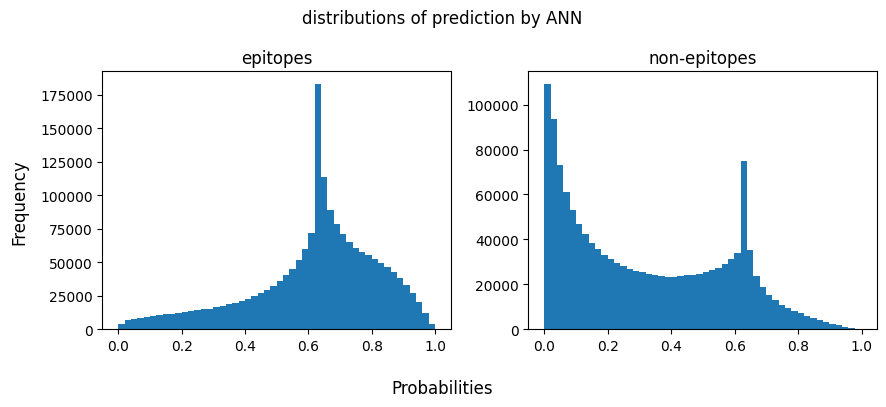

In [12]:
fig,ax=plt.subplots(1,2,figsize=(9,4), layout='tight')
fig.suptitle('distributions of prediction by ANN')
fig.supxlabel('Probabilities')
fig.supylabel('Frequency')

i=0
ax[i].hist(cdf[cdf['label']=='epitope']['pred_ann'], bins=50)
ax[i].set_title('epitopes')

i=1
ax[i].hist(cdf[~(cdf['label']=='epitope')]['pred_ann'], bins=50)
ax[i].set_title('non-epitopes')

plt.show()

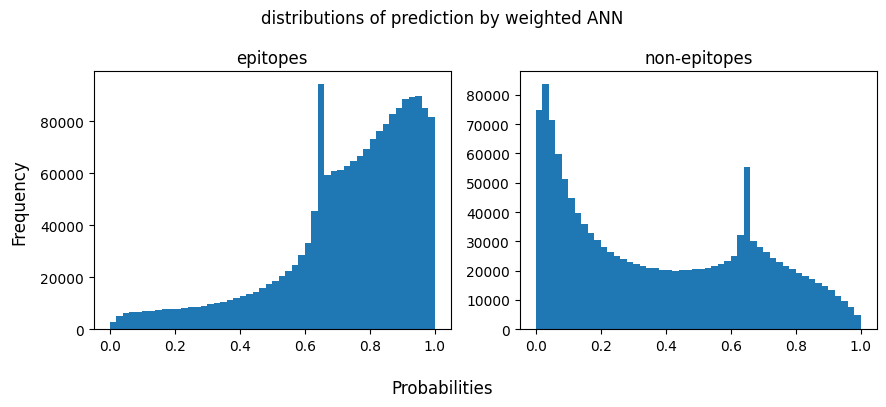

In [13]:
fig,ax=plt.subplots(1,2,figsize=(9,4), layout='tight')
fig.suptitle('distributions of prediction by weighted ANN')
fig.supxlabel('Probabilities')
fig.supylabel('Frequency')

i=0
ax[i].hist(cdf[cdf['label']=='epitope']['pred_wann'], bins=50)
ax[i].set_title('epitopes')

i=1
ax[i].hist(cdf[~(cdf['label']=='epitope')]['pred_wann'], bins=50)
ax[i].set_title('non-epitopes')

plt.show()